# Statistical Pattern Recognition - Solution 2: Parametric distributions

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import markers


## $\star$ Part 1: Pen and Paper exercise

Verify the ML estimator for the Bernoulli distribution given in the lecture slides.

## $\star$ Part 2: ML estimation

Estimate the mean and covariance matrix of the dataset *gaussian.npz* via ML
estimation.

Plot the points and indicate the mean via a cross and the covariance via an
ellipse. 

Consult the matplotlib documentation to see how to draw an ellipse. 
(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Ellipse.html)


You obtain the ellipse axes by an eigen-decomposition of the matrix (Numpy function linalg.eig). 

The scaling of the axes is given by the eigenvalues.
Review the concept of an eigen-decomposition in the
internet or a math book if you lack this basic math knowledge.

### Part 2.1: Mean and Covariance estimation

Estimate the mean and covariance matrix of the dataset, you can compare these to the built in numpy functions and see if you see a difference.


In [6]:
# Load the data

# START TODO #################
data = np.load("../data/gaussian.npz")
arr = data[data.files[0]]
N = np.size(arr, axis=0)

mu_ML = (1/N) * np.sum(arr, axis=0)
sigma_ML = (1/N) * (arr.T @ arr) - np.outer(mu_ML, mu_ML)

mu_ML_np= np.mean(arr, axis=0) 
sigma_ML_np = np.cov(arr, rowvar=False, bias=True) 

print(mu_ML)
print(sigma_ML)
print(mu_ML_np)
print(sigma_ML_np)
# END TODO #################


[2.12308534 3.12168402]
[[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]]
[2.12308534 3.12168402]
[[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]]


### Part 2.2: Plotting the graph

Plot the points and indicate the mean via a cross and the covariance via an ellipse.


Eigenvalues: [0.19447293 5.1295803 ]


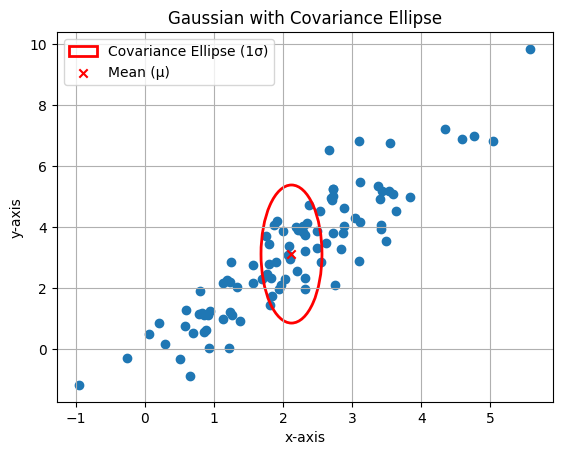

In [ ]:
# START TODO #################

fig, ax = plt.subplots()


x = arr[:,0]
y = arr[:,1]
ax.scatter(x, y, marker='o')


vals, vecs = np.linalg.eig(sigma_ML)
print("Eigenvalues:", vals)



width, height = 2 * np.sqrt(vals)


ellipse = Ellipse(
    xy=mu_ML,
    width=width,
    height=height,
    edgecolor='red',
    facecolor='none',
    linewidth= 2,
    label='Covariance Ellipse (1σ)'
)


ax.add_patch(ellipse)
ax.scatter(mu_ML[0], mu_ML[1], color='red', marker='x', label='Mean (μ)')


ax.set_title("Gaussian with Covariance Ellipse")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.legend()
ax.grid(True)
plt.autoscale(enable=True)

plt.show()
# END TODO #################

# END TODO #################


## $\star\star$ Part 3: MAP estimation

Create reduced datasets by considering only the first 2, 5, 10 points and estimate the mean via MAP. 

Use the ML estimate of the covariance $ \Sigma $ <sub>**ML,100**</sub> (estimated from all 100 points) as known covariance. 

Assume the conjugate prior with $\mu_0 = (2,3)^T $ and covariance $\Sigma_0 =\Sigma $ <sub>**ML,100**</sub>


Draw the ML and the MAP estimates into the point clouds (the covariance is the same as it is assumed to be known here). 

How reliable is the ML estimate when there are only few measurements? 

Now work with a slightly wrong prior $\mu_0 = (2,5)^T $
and see how the effect of the prior is reduced as more measurements come in.


### Part 3.1: Using the correct prior

Using   $\mu_0 = (2,3)^T $

For the formulae for the multivariate Gaussian MAP estimate given mean prior, covariance prior and true covariance see:

[0] [https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf](https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf) page 17 equation (211)

[1] [https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf](https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf) Page 17 equation(212)

For details see Christopher M. Bishop, Pattern Recognition and Machine Learning, p. 92.


In [42]:
# Estimate the ML and MAP mean
# START TODO #################
mu_0 = np.array([2, 3])
sigma_0_inv = np.linalg.inv(sigma_ML)
sigma_inv = sigma_0_inv  # since Σ_0 = Σ

N_list = [2, 5, 10]
mu_MAP = []

for n in N_list:
    
    x_n = arr[:n]
    x_bar = np.mean(x_n, axis=0)

    sigma_MAP = np.linalg.inv(sigma_0_inv + n * sigma_inv)

    mu_n = sigma_MAP @ (sigma_0_inv @ mu_0 + n * sigma_inv @ x_bar)

    mu_MAP.append(mu_n)






# END TODO #################


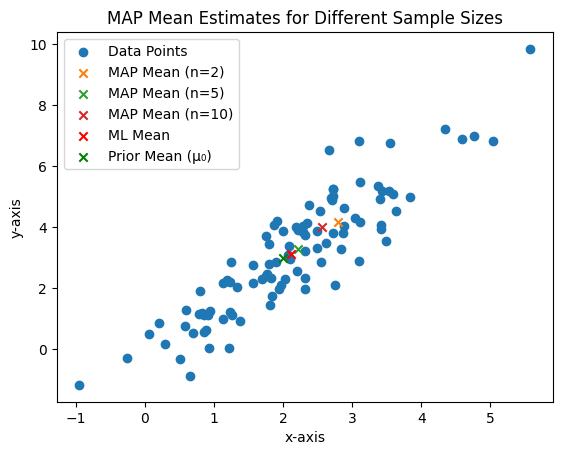

In [43]:
# Plot the datapoints and the ML and MAP mean estimates for different numbers of samples

# START TODO #################
fig, ax = plt.subplots()
x = arr[:,0]
y = arr[:,1]
ax.scatter(x, y, marker='o', label='Data Points')
for i, n in enumerate(N_list):
    mu_n = mu_MAP[i]
    ax.scatter(mu_n[0], mu_n[1], marker='x', label=f'MAP Mean (n={n})')
ax.scatter(mu_ML[0], mu_ML[1], color='red', marker='x', label='ML Mean')
ax.scatter(mu_0[0], mu_0[1], color='green', marker='x', label='Prior Mean (μ₀)')
ax.set_title("MAP Mean Estimates for Different Sample Sizes")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.legend()
plt.autoscale(enable=True)
plt.show()
# END TODO #################


### Part 3.2: Using a slightly wrong prior

Using $\mu_0 = (2,5)^T $


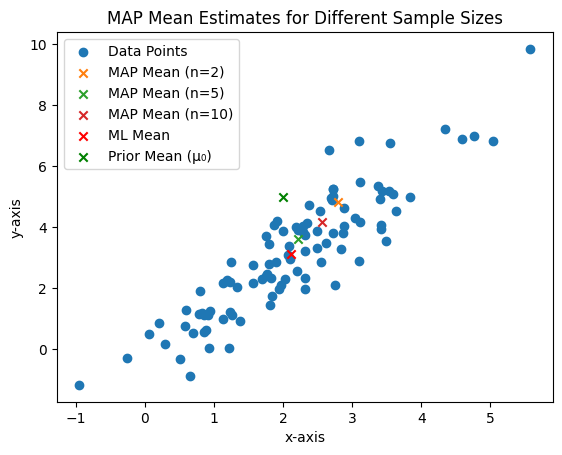

In [45]:
# START TODO #################
mu_0 = np.array([2, 5])
sigma_0_inv = np.linalg.inv(sigma_ML)
sigma_inv = sigma_0_inv  # since Σ_0 = Σ

N_list = [2, 5, 10]
mu_MAP = []

for n in N_list:
    
    x_n = arr[:n]
    x_bar = np.mean(x_n, axis=0)

    sigma_MAP = np.linalg.inv(sigma_0_inv + n * sigma_inv)

    mu_n = sigma_MAP @ (sigma_0_inv @ mu_0 + n * sigma_inv @ x_bar)

    mu_MAP.append(mu_n)

fig, ax = plt.subplots()
x = arr[:,0]
y = arr[:,1]
ax.scatter(x, y, marker='o', label='Data Points')
for i, n in enumerate(N_list):
    mu_n = mu_MAP[i]
    ax.scatter(mu_n[0], mu_n[1], marker='x', label=f'MAP Mean (n={n})')
ax.scatter(mu_ML[0], mu_ML[1], color='red', marker='x', label='ML Mean')
ax.scatter(mu_0[0], mu_0[1], color='green', marker='x', label='Prior Mean (μ₀)')
ax.set_title("MAP Mean Estimates for Different Sample Sizes")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.legend()
plt.autoscale(enable=True)
plt.show()
# END TODO #################


## $\star$ Part 4: Gaussianplus

Estimate mean and covariance of the dataset *gaussianplus.npz* using ML and show the result.
How well does the estimate reflect the true data?


Eigenvalues: [0.91180186 6.30881051]


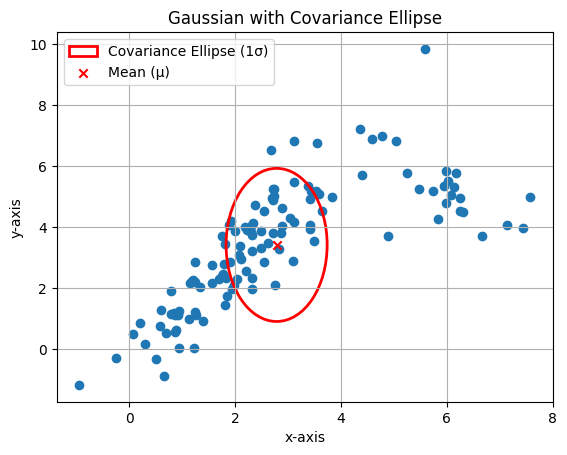

In [47]:
# START TODO #################
data = np.load("../data/gaussianplus.npz")
arr = data[data.files[0]]
N = np.size(arr, axis=0)

mu_ML = (1/N) * np.sum(arr, axis=0)
sigma_ML = (1/N) * (arr.T @ arr) - np.outer(mu_ML, mu_ML)

mu_ML_np= np.mean(arr, axis=0) 
sigma_ML_np = np.cov(arr, rowvar=False, bias=True) 


fig, ax = plt.subplots()


x = arr[:,0]
y = arr[:,1]
ax.scatter(x, y, marker='o')


vals, vecs = np.linalg.eig(sigma_ML)
print("Eigenvalues:", vals)



width, height = 2 * np.sqrt(vals)


ellipse = Ellipse(
    xy=mu_ML,
    width=width,
    height=height,
    edgecolor='red',
    facecolor='none',
    linewidth= 2,
    label='Covariance Ellipse (1σ)'
)


ax.add_patch(ellipse)
ax.scatter(mu_ML[0], mu_ML[1], color='red', marker='x', label='Mean (μ)')


ax.set_title("Gaussian with Covariance Ellipse")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.legend()
ax.grid(True)
plt.autoscale(enable=True)

plt.show()
# END TODO #################
